In [358]:
# 필요한 모듈 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [107]:
# Data 불러오기
election = pd.read_csv("../Data/election_2022.csv")
election

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
0,서울특별시,종로구,129968,100629,46130,49172,3115
1,서울특별시,중구,111448,84998,38244,42906,2310
2,서울특별시,용산구,199077,152068,60063,85047,4374
3,서울특별시,성동구,252087,197240,84411,103880,5365
4,서울특별시,광진구,303582,235471,109922,113733,7072
...,...,...,...,...,...,...,...
243,경상남도,산청군,31645,24913,7125,16607,464
244,경상남도,거창군,53049,41399,11963,27254,895
245,경상남도,합천군,39768,31270,6911,22742,511
246,제주특별자치도,제주시,408552,296826,157695,122084,10007


In [108]:
# 기본 통계량 확인하기
election.describe()
# 이재명의 표준 오차가 높다 == 쏠림 현상이 있다 (특정 지역구에서 표를 많이 받음)

,선거인수,투표수,이재명,윤석열,심상정
count,248.000000,248.000000,248.000000,248.000000,248.000000
mean,176570.540323,136147.838710,64479.104839,65566.290323,3215.532258
std,141049.731983,108569.706317,56875.864428,56766.365763,2893.695797
min,8141.000000,6653.000000,1590.000000,2052.000000,109.000000
25%,47671.500000,39215.750000,17363.000000,18223.000000,709.000000
50%,154353.500000,114654.000000,48797.000000,50341.000000,2617.500000
75%,265099.250000,204189.250000,99830.750000,101949.750000,5041.000000
max,703896.000000,542027.000000,285227.000000,275155.000000,13249.000000


In [109]:
# 컬럼명 확인하기
election.columns

Index(['광역시도', '시군구', '선거인수', '투표수', '이재명', '윤석열', '심상정'], dtype='object')

In [110]:
# dimension 확인하기
election.shape

(248, 7)

In [111]:
# 컬럼별 자료 타입 확인하기
election.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   광역시도    248 non-null    object
 1   시군구     248 non-null    object
 2   선거인수    248 non-null    int64 
 3   투표수     248 non-null    int64 
 4   이재명     248 non-null    int64 
 5   윤석열     248 non-null    int64 
 6   심상정     248 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 13.7+ KB


In [112]:
# NaN
election.isnull().any()
election.isnull().sum()

광역시도    0
시군구     0
선거인수    0
투표수     0
이재명     0
윤석열     0
심상정     0
dtype: int64

In [113]:
# election에 electionSum이라는 컬럼 생성하기 (윤석열 + 이재명 + 심상정)
election['electionSum'] = election[['윤석열','이재명','심상정']].sum(axis=1)
election


,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417
1,서울특별시,중구,111448,84998,38244,42906,2310,83460
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727
...,...,...,...,...,...,...,...,...
243,경상남도,산청군,31645,24913,7125,16607,464,24196
244,경상남도,거창군,53049,41399,11963,27254,895,40112
245,경상남도,합천군,39768,31270,6911,22742,511,30164
246,제주특별자치도,제주시,408552,296826,157695,122084,10007,289786


In [114]:
# electionSum이 pop의 몇 퍼센트?
election['electionRatio'] = round(election.electionSum/election.투표수*100,2)
election

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99
...,...,...,...,...,...,...,...,...,...
243,경상남도,산청군,31645,24913,7125,16607,464,24196,97.12
244,경상남도,거창군,53049,41399,11963,27254,895,40112,96.89
245,경상남도,합천군,39768,31270,6911,22742,511,30164,96.46
246,제주특별자치도,제주시,408552,296826,157695,122084,10007,289786,97.63


In [115]:
# csv로 저장하기
election.to_csv("../Data/election_2022_job.csv", index=False)

In [116]:
# 광역시도별 투표율 파이차트
election

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99
...,...,...,...,...,...,...,...,...,...
243,경상남도,산청군,31645,24913,7125,16607,464,24196,97.12
244,경상남도,거창군,53049,41399,11963,27254,895,40112,96.89
245,경상남도,합천군,39768,31270,6911,22742,511,30164,96.46
246,제주특별자치도,제주시,408552,296826,157695,122084,10007,289786,97.63


In [117]:
# region_vote = election.groupby('광역시도').sum()['투표수']
# region_vote
elec_sum = election.pivot_table('투표수',index='광역시도',aggfunc=sum)
elec_sum

,투표수
광역시도,
강원도,1015458
경기도,8518854
경상남도,2146882
경상북도,1774284
광주광역시,985492
대구광역시,1611512
대전광역시,945308
부산광역시,2200224
서울특별시,6501831


In [118]:
elec_sum_order = elec_sum.copy()
elec_sum_order = elec_sum_order.sort_values('투표수',ascending=False)
elec_sum_order

,투표수
광역시도,
경기도,8518854
서울특별시,6501831
부산광역시,2200224
경상남도,2146882
인천광역시,1883504
경상북도,1774284
대구광역시,1611512
충청남도,1324660
전라남도,1282168


In [119]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc

# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

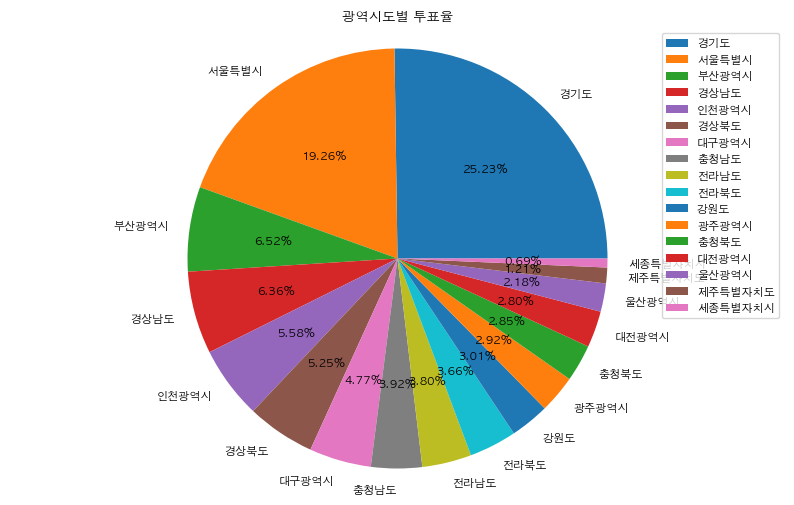

In [120]:
elec_sum_order['투표수'].plot(
    kind='pie',
    figsize=(10,6),
    autopct='%.2f%%',
    startangle=0
)
plt.title('광역시도별 투표율')
plt.axis('equal')
plt.rcParams['font.size'] = 8
plt.ylabel('')
plt.legend()
plt.show()

### 윤석열 후보의 광역시도별 득표율을 pie chart로 표현하기

In [121]:
election
yoon = election.pivot_table('윤석열',index='광역시도',aggfunc=sum)
yoon = yoon.sort_values('윤석열',ascending=False)
yoon

,윤석열
광역시도,
경기도,3859666
서울특별시,3255747
경상북도,1278922
부산광역시,1270072
경상남도,1237346
대구광역시,1199888
인천광역시,878560
충청남도,670283
강원도,544980


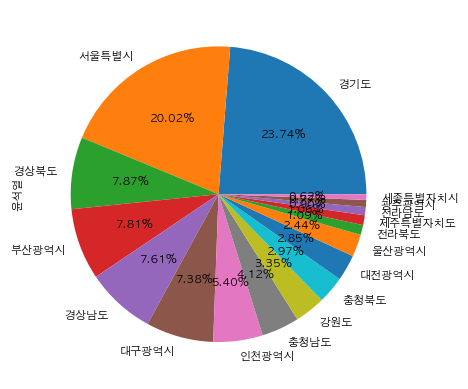

In [122]:
yoon['윤석열'].plot(
    kind='pie',
    autopct='%.2f%%',
)
plt.show()

### 윤석열 후보의 서울 득표 top5

In [200]:
seoul = election[election['광역시도']=='서울특별시']
seoul_yoon_order = seoul.sort_values(by='윤석열',ascending=False)
seoul_yoon_order
seoul_yoon_order = seoul_yoon_order.pivot_table('윤석열',index='시군구').sort_values(by='윤석열',ascending=False)
seoul_yoon_order_top5 = seoul_yoon_order.iloc[0:5]
seoul_yoon_order_top5
seoul_yoon_order.iloc[5:].pivot_table('윤석열', index='시군구')
# seoul_yoon_order_top5.loc[len(seoul_yoon_order_top5)] = ['기타',seoul_yoon_order.iloc[5:].sum()]

,윤석열
시군구,
강동구,160593
강북구,86540
관악구,151944
광진구,113733
구로구,127129
금천구,69227
도봉구,99780
동대문구,112890
동작구,135733


In [157]:
seoul_yoon_order_top5.iloc[0:5]

,윤석열
시군구,
송파구,255166
강남구,235897
강서구,181510
서초구,179472
노원구,163340


<AxesSubplot: ylabel='윤석열'>

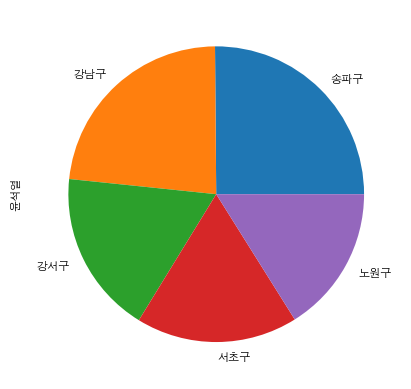

In [158]:
seoul_yoon_order_top5.iloc[0:5]['윤석열'].plot(
    kind='pie'
)

### 윤석열 후보의 출생지는 성북구 - 성북구의 후보별 득표율 파이차트


In [223]:
sungbuk = election[election['시군구'] == '성북구']
sungbuk

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
7,서울특별시,성북구,375880,292187,142702,135044,8952,286698,98.12


In [ ]:
sungbuk['기타'] = sungbuk['투표수'] - sungbuk.loc[:,'이재명':'심상정'].sum(axis=1)
sungbuk
sungbuk.drop(columns=['광역시도'],inplace=True)
sungbuk

In [234]:
sungbuk.set_index(['시군구'],inplace=True)

In [236]:
sungbuk

,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio,기타
시군구,,,,,,,,
성북구,375880,292187,142702,135044,8952,286698,98.12,5489


In [243]:
sungbuk_vote = sungbuk[['이재명','윤석열','심상정','기타']]

In [246]:
sungbuk_vote.info()
sungbuk_vote.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 성북구 to 성북구
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   이재명     1 non-null      int64
 1   윤석열     1 non-null      int64
 2   심상정     1 non-null      int64
 3   기타      1 non-null      int64
dtypes: int64(4)
memory usage: 40.0+ bytes


,이재명,윤석열,심상정,기타
count,1.0,1.0,1.0,1.0
mean,142702.0,135044.0,8952.0,5489.0
std,NaN,NaN,NaN,NaN
min,142702.0,135044.0,8952.0,5489.0
25%,142702.0,135044.0,8952.0,5489.0
50%,142702.0,135044.0,8952.0,5489.0
75%,142702.0,135044.0,8952.0,5489.0
max,142702.0,135044.0,8952.0,5489.0


In [250]:
sungbuk_vote.T

시군구,성북구
이재명,142702
윤석열,135044
심상정,8952
기타,5489


<AxesSubplot: ylabel='성북구'>

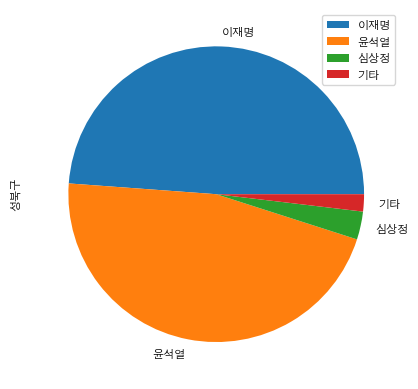

In [251]:
sungbuk_vote.T.plot(
    kind='pie',
    y='성북구'
)

### 투표수가 가장 많은 4지역의 후보별 득표수 차이

In [305]:
election

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99
...,...,...,...,...,...,...,...,...,...
243,경상남도,산청군,31645,24913,7125,16607,464,24196,97.12
244,경상남도,거창군,53049,41399,11963,27254,895,40112,96.89
245,경상남도,합천군,39768,31270,6911,22742,511,30164,96.46
246,제주특별자치도,제주시,408552,296826,157695,122084,10007,289786,97.63


In [260]:
vote_count = election.pivot_table('투표수',index='광역시도',aggfunc=sum)
vote_count.sort_values(by='투표수',ascending=False, inplace=True)
vote_count

,투표수
광역시도,
경기도,8518854
서울특별시,6501831
부산광역시,2200224
경상남도,2146882
인천광역시,1883504
경상북도,1774284
대구광역시,1611512
충청남도,1324660
전라남도,1282168


In [263]:
top4 = vote_count.iloc[0:4].index

In [264]:
top4

Index(['경기도', '서울특별시', '부산광역시', '경상남도'], dtype='object', name='광역시도')

In [306]:
top4_vote = election.pivot_table(['이재명','윤석열','심상정'],index='광역시도',aggfunc=sum)
# top4_vote[top4_vote['광역시도'] == top4[0]]
top4_vote_region = top4_vote[top4_vote.index.isin(top4)]
top4_vote_region['합계'] = top4_vote_region.sum(axis=1)
top4_vote_region.sort_values(by='합계',ascending=False, inplace=True)

/var/folders/k_/0wcctvbj41ncld1_xmh98p6w0000gn/T/ipykernel_54145/1780538428.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top4_vote_region['합계'] = top4_vote_region.sum(axis=1)
/var/folders/k_/0wcctvbj41ncld1_xmh98p6w0000gn/T/ipykernel_54145/1780538428.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top4_vote_region.sort_values(by='합계',ascending=False, inplace=True)


In [309]:
top4_vote_region

,심상정,윤석열,이재명,합계
광역시도,,,,
경기도,201113,3859666,4297931,8358710
서울특별시,180324,3255747,2944981,6381052
부산광역시,47541,1270072,831896,2149509
경상남도,52591,1237346,794130,2084067


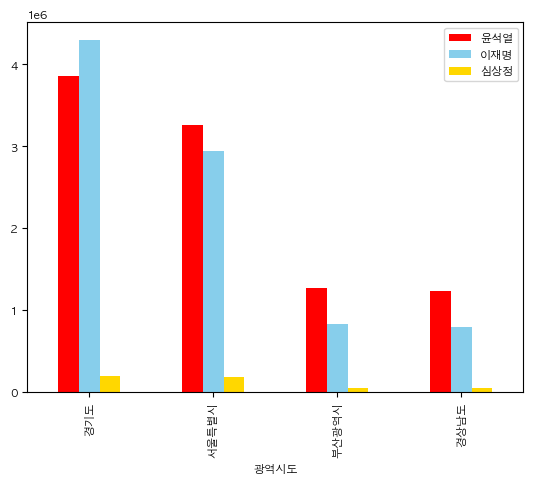

In [320]:
top4_vote_region.iloc[:,[1,2,0]].plot(
    kind='bar',
    color=['red','#87CEEB','gold']
)
# plt.ticklabel_format(useOffset=False)
plt.show()

### 투표수가 높은 시군의 후보별 득표수

In [324]:
election

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
0,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80
1,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19
2,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30
3,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18
4,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.99
...,...,...,...,...,...,...,...,...,...
243,경상남도,산청군,31645,24913,7125,16607,464,24196,97.12
244,경상남도,거창군,53049,41399,11963,27254,895,40112,96.89
245,경상남도,합천군,39768,31270,6911,22742,511,30164,96.46
246,제주특별자치도,제주시,408552,296826,157695,122084,10007,289786,97.63


In [331]:
city_top5 = election.pivot_table(['이재명','윤석열','심상정','투표수'],index=['광역시도','시군구'],aggfunc=sum).sort_values(by='투표수',ascending=False).iloc[0:5]
city_top5

심상정     윤석열     이재명     투표수
광역시도  시군구                                
경기도   화성시   12955  236055  283324  542027
      부천시   13249  224331  285227  532995
      남양주시  10089  203075  239179  460518
서울특별시 송파구   10652  255166  180490  453536
      강서구   11100  181510  190000  390247

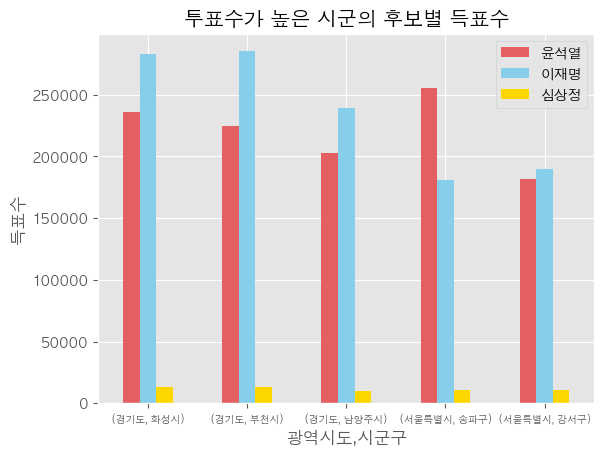

In [357]:
plt.style.use('ggplot')
city_top5[['윤석열','이재명','심상정']].plot(
    kind='bar',
    color=['#e35f62','skyblue','gold'],
    ylabel='득표수',
    title='투표수가 높은 시군의 후보별 득표수',
)

plt.xticks(rotation=0, fontsize=7)
plt.show()